## **Problem Statement: Automated Classification of Date Fruit Varieties**

### **Background**
Date fruits, grown globally, have various genetic varieties distinguished by their external appearance, including features like color, length, diameter, and shape. Traditionally, identifying these varieties requires expert knowledge, which is both time-consuming and labor-intensive. Automating this process using machine learning can significantly enhance efficiency and accuracy.

### **Objective**
The aim of this study is to develop an automated system for classifying different varieties of date fruits using image analysis and machine learning techniques. Specifically, the varieties to be classified include Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai.

### **Dataset Description**
The dataset consists of 898 images of seven different date fruit varieties, captured using a computer vision system (CVS). From these images, 34 features were extracted, encompassing morphological characteristics, shape, and color.

### **Impact**
Developing an automated classification system for date fruit varieties will streamline the identification process, reduce the need for expert intervention, and ensure consistent and accurate classification. This can significantly benefit agricultural practices, quality control, and market segmentation for date fruits.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/My Drive/Date_Fruit_Datasets.xlsx'

In [4]:
# Load the dataset
data = pd.read_excel(file_path)

In [5]:
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [6]:
#Displaying the dimensions of the DataFrame: the number of rows and the number of columns.
data.shape

(898, 35)

In [7]:
#Displaying information about a dataset, including the number of non-null entries, data types of each column, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [8]:
#Generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
data.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [9]:
missing_values = data.isna().sum()
missing_values

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [10]:
# Separate features and target
X = data.drop(['Class'], axis=1)
Y = data['Class']

In [11]:
X.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666


In [12]:
Y.head()

0    BERHI
1    BERHI
2    BERHI
3    BERHI
4    BERHI
Name: Class, dtype: object

In [13]:
Y.unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [14]:
le = LabelEncoder()
y = le.fit_transform(Y)

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 42 , test_size = 0.2)

In [17]:
X_train

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
880,364338,2385.5110,849.6287,548.4377,0.7638,681.0944,0.9874,368969,0.7596,1.5492,...,0.3835,2.5413,2.7010,4.7956,-45702238208,-31309285376,-31791349760,54.5422,46.1706,47.5687
740,343379,2360.4670,919.1130,479.2314,0.8533,661.2138,0.9657,355591,0.6926,1.9179,...,0.8084,13.2536,10.8915,5.0327,-6173152768,-10177111040,-13946608640,20.5354,27.7553,33.2095
231,80044,1059.0460,378.1419,270.6614,0.6983,319.2416,0.9883,80990,0.7521,1.3971,...,-0.1599,2.2247,2.4509,2.2165,-9834114048,-9082079232,-8377428480,54.3915,53.0591,50.5000
388,394009,2279.7581,770.8477,654.0494,0.5292,708.2852,0.9945,396190,0.7632,1.1786,...,1.6654,5.7796,9.1424,7.8056,-18411845632,-23242752000,-23591233536,34.5177,38.9835,38.4695
118,242874,1843.9160,647.9982,479.8817,0.6720,556.0906,0.9906,245181,0.7818,1.3503,...,-0.3694,2.4534,2.2759,2.5079,-46650236928,-40748339200,-32199612416,66.5225,62.6833,56.9092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,169573,1548.9830,594.8965,364.4516,0.7904,464.6580,0.9932,170738,0.8245,1.6323,...,-0.6257,2.4879,2.1186,2.4125,-35847098368,-33293408256,-27052677120,69.5829,67.4267,61.7498
270,102142,1223.5020,441.7251,296.5040,0.7412,360.6262,0.9863,103559,0.7847,1.4898,...,-0.5385,3.7325,3.9749,3.0696,-20307597312,-20240594944,-18247018496,68.7153,69.4312,65.9034
860,212397,1773.1410,649.3710,418.6798,0.7644,520.0310,0.9773,217331,0.7605,1.5510,...,0.1680,2.8597,2.8887,3.0498,-21660262400,-16450807808,-15513940992,50.1400,43.9826,43.0455
435,441826,2486.4771,942.0581,603.1290,0.7682,750.0336,0.9948,444138,0.8075,1.5620,...,1.7484,7.9695,9.3755,7.3022,-36332118016,-32863416320,-37779701760,43.0456,41.0627,43.2121


In [18]:
X_test

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
331,143957,1452.2620,523.1368,352.3305,0.7392,428.1259,0.9844,146236,0.7746,1.4848,...,-0.3565,4.1478,3.4278,2.4134,-36987568128,-34249711616,-23752157184,77.3446,75.2287,62.9057
638,260563,1975.3740,762.5055,437.8510,0.8187,575.9854,0.9871,263977,0.6648,1.7415,...,0.3581,7.7778,16.2644,3.6606,-2424508160,-4791147520,-8197618688,16.2304,22.3860,28.8860
326,154245,1503.5980,546.4366,361.8018,0.7494,443.1601,0.9883,156070,0.7420,1.5103,...,0.3657,2.4202,2.9624,3.0045,-14960579584,-14010061824,-14057613312,48.2049,46.8561,46.4054
848,317794,2280.9690,875.5868,525.3380,0.8000,636.1037,0.9016,352462,0.6484,1.6667,...,0.3719,2.2682,2.1522,2.9676,-47417053184,-39451316224,-33127270400,58.7696,54.0476,50.8977
39,402279,2295.8630,798.9365,643.2753,0.5931,715.6797,0.9936,404887,0.7867,1.2420,...,1.9477,5.5889,12.5304,9.9496,-30746945536,-32178810880,-35126345728,43.7705,45.6162,46.3010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,283770,2096.7639,775.8751,468.8516,0.7968,601.0883,0.9737,291436,0.6751,1.6548,...,0.8440,11.0456,12.1213,6.1299,-4560918528,-7281993216,-9060293632,20.5245,25.8721,29.4805
25,381508,2239.7891,734.2203,666.2502,0.4202,696.9584,0.9919,384642,0.7398,1.1020,...,2.0740,6.6729,10.5392,9.3474,-25635362816,-25228310528,-28113027072,41.0071,41.1774,41.5364
84,253276,1961.0400,740.2677,437.3487,0.8068,567.8741,0.9822,257864,0.7493,1.6926,...,-0.1425,2.0920,1.9879,2.1549,-45574098944,-41109114880,-35898662912,64.4454,61.4443,58.3921
10,364495,2216.4900,790.9014,590.7698,0.6649,681.2411,0.9949,366374,0.7658,1.3388,...,0.9283,3.0514,4.3653,6.0898,-41679380480,-40727969792,-37574615040,52.7269,52.9888,50.3108


In [19]:
y_train

array([6, 5, 2, 3, 1, 3, 2, 0, 0, 5, 4, 5, 2, 1, 2, 4, 4, 4, 5, 4, 6, 6,
       4, 2, 5, 5, 5, 4, 4, 2, 4, 6, 5, 6, 2, 0, 5, 1, 4, 3, 1, 2, 6, 2,
       2, 3, 2, 5, 2, 4, 0, 2, 6, 4, 2, 1, 4, 6, 5, 5, 5, 5, 3, 4, 3, 4,
       3, 6, 5, 2, 4, 1, 1, 3, 0, 3, 3, 4, 6, 2, 1, 4, 4, 5, 4, 5, 6, 2,
       3, 5, 2, 2, 4, 6, 2, 6, 1, 6, 2, 5, 5, 1, 1, 3, 6, 1, 2, 0, 4, 2,
       2, 4, 4, 3, 1, 2, 0, 4, 4, 1, 5, 3, 5, 1, 2, 2, 5, 3, 1, 4, 4, 2,
       0, 4, 1, 3, 0, 2, 4, 6, 0, 2, 3, 3, 0, 3, 6, 5, 2, 4, 5, 3, 5, 0,
       5, 4, 1, 0, 2, 2, 2, 5, 0, 2, 4, 4, 2, 4, 5, 5, 3, 4, 4, 2, 4, 5,
       2, 2, 4, 5, 1, 1, 4, 5, 1, 1, 4, 1, 4, 1, 2, 6, 6, 6, 4, 5, 1, 0,
       3, 0, 0, 2, 2, 5, 4, 5, 4, 2, 4, 5, 4, 2, 5, 5, 5, 3, 2, 4, 2, 5,
       0, 0, 3, 2, 4, 6, 5, 3, 2, 6, 6, 5, 2, 4, 0, 2, 0, 2, 2, 4, 5, 6,
       4, 2, 6, 4, 2, 2, 1, 4, 4, 6, 2, 2, 5, 3, 4, 1, 1, 5, 4, 2, 1, 6,
       2, 2, 5, 4, 2, 1, 5, 1, 1, 5, 2, 2, 0, 6, 4, 5, 3, 4, 1, 2, 5, 1,
       2, 5, 5, 4, 4, 2, 2, 5, 1, 5, 6, 6, 5, 3, 2,

In [20]:
y_test

array([2, 5, 2, 6, 0, 2, 3, 2, 2, 1, 1, 2, 2, 2, 4, 4, 6, 5, 6, 1, 5, 4,
       2, 4, 5, 2, 0, 6, 0, 5, 6, 1, 2, 4, 2, 5, 0, 2, 2, 5, 1, 4, 5, 5,
       2, 1, 1, 2, 2, 5, 4, 3, 2, 6, 2, 4, 1, 2, 2, 0, 3, 6, 2, 2, 2, 6,
       1, 2, 4, 4, 2, 2, 4, 6, 3, 4, 2, 4, 5, 4, 2, 1, 4, 4, 2, 4, 2, 5,
       3, 2, 2, 5, 5, 3, 1, 2, 2, 2, 2, 4, 4, 3, 2, 5, 5, 4, 3, 4, 4, 2,
       5, 2, 4, 4, 4, 6, 1, 5, 5, 4, 4, 2, 5, 1, 5, 5, 6, 1, 4, 4, 2, 1,
       3, 4, 4, 2, 4, 2, 5, 0, 5, 5, 5, 6, 6, 5, 2, 0, 0, 5, 6, 4, 6, 1,
       1, 5, 6, 1, 2, 3, 5, 2, 6, 5, 0, 0, 2, 4, 2, 4, 1, 6, 5, 6, 6, 5,
       0, 1, 0, 2])

In [21]:
#Standardizing features by removing the mean and scaling to unit variance.
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [22]:
# Checking if there is any na value in dataset
data.isna().sum().to_frame()

,0
AREA,0
PERIMETER,0
MAJOR_AXIS,0
MINOR_AXIS,0
ECCENTRICITY,0
EQDIASQ,0
SOLIDITY,0
CONVEX_AREA,0
EXTENT,0
ASPECT_RATIO,0


In [23]:
# Counting the number of instances of each class
data['Class'].value_counts()

Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64

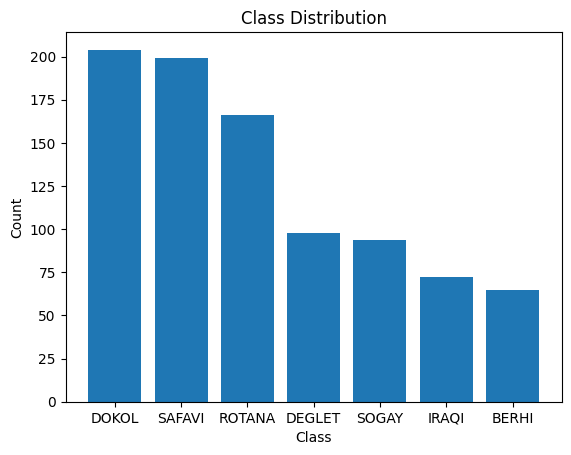

In [24]:
#Plotting a bar chart to show the classes
plt.bar(data['Class'].value_counts().index.to_list(), data['Class'].value_counts().values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [25]:
X.shape, y.shape

((898, 34), (898,))

In [26]:
# Encode categorical data for both features and target variable
data['Class'] = data['Class'].map({'BERHI': 0, 'DEGLET': 1,'DOKOL': 2, 'IRAQI': 3,'ROTANA': 4, 'SAFAVI': 5,'SOGAY': 6})
Y = data['Class'] # Assuming 'Class' is your target variable

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Build the initial MLPRegressor model
mlp = MLPRegressor(random_state=42, max_iter=1000)
mlp.fit(X_train, Y_train)

MLPRegressor(max_iter=1000, random_state=42)

In [27]:
# Make predictions
Y_train_pred = mlp.predict(X_train)
Y_test_pred = mlp.predict(X_test)

In [28]:
# Evaluate the model
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)


print(f"Initial MLP Regressor Train Mean Squared Error: {mse_train}")
print(f"Initial MLP Regressor Test Mean Squared Error: {mse_test}")

Initial MLP Regressor Train Mean Squared Error: 0.14748531703396572
Initial MLP Regressor Test Mean Squared Error: 0.8721664768987897


In [29]:
# Use RandomizedSearchCV to find the best hyperparameters
param_dist = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (100,100,100)],
    'activation': ['tanh', 'relu','softmax'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.01, 0.1],
    'learning_rate': ['constant','adaptive'],
}

random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=20, cv=3, random_state=42)
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=MLPRegressor(max_iter=1000, random_state=42),
                   n_iter=20,
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'softmax'],
                                        'alpha': [0.0001, 0.05, 0.01, 0.1],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,),
                                                               (100, 100, 100)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']},
                   random_state=42)

In [30]:
# Best parameters
print(f"Best parameters found: {random_search.best_params_}")

# Evaluate the optimized model
optimized_mlp = random_search.best_estimator_
y_train_pred_optimized = optimized_mlp.predict(X_train)
y_test_pred_optimized = optimized_mlp.predict(X_test)


mse_train_optimized = mean_squared_error(Y_train, y_train_pred_optimized)
mse_test_optimized = mean_squared_error(Y_test, y_test_pred_optimized)


print(f"Optimized MLP Regressor Train Mean Squared Error: {mse_train_optimized}")
print(f"Optimized MLP Regressor Test Mean Squared Error: {mse_test_optimized}")

Best parameters found: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.05, 'activation': 'tanh'}
Optimized MLP Regressor Train Mean Squared Error: 0.2694018022736431
Optimized MLP Regressor Test Mean Squared Error: 0.5623043040912691


In [31]:
# Using MLP model
INPUTS = 34  # Number of columns in X
CLASSES = 7  # Number of different classes in y
EPOCHS = 900  # Maximum number of epochs MLP will attempt to run until convergence
SEED = 42  # Random seed for reproducibility

# Create the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(INPUTS, CLASSES),
                          alpha=0.05,
                          solver='sgd',
                          activation='relu',
                          learning_rate='adaptive',
                          verbose=False,
                          max_iter=EPOCHS,
                          random_state=SEED
                         )
# No need to reshape X_train for MLPClassifier
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train = np.reshape(X_train, (X_train.shape[0], -1))

# Train the model with training data
mlp_model.fit(X_train, Y_train)  # Training data already scaled with StandardScaler

# Reshape X_test to 2D before prediction
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Make predictions with the test set
predictions_mlp = mlp_model.predict(X_test_reshaped)

In [32]:
# Calculate the accuracy of the model
accuracy_mlp = accuracy_score(Y_test, predictions_mlp)
print("The accuracy is",  accuracy_mlp)

# Calculate the F1-Score
import sklearn
from sklearn.metrics import f1_score
f1_score_mlp = sklearn.metrics.f1_score(Y_test, predictions_mlp, average='weighted')
print("F1-score of the MLP model: {:.2f}".format(f1_score_mlp))

The accuracy is 0.9444444444444444
F1-score of the MLP model: 0.95


The accuracy of 0.9444 and F1 score of 0.95 is indicative that the model is highly effective at making accurate predictions, balancing the trade-offs between precision and recall.

In [33]:
# Classification Report
classes = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQUI', 'ROTANA', 'SAFAVI', 'SOGAY']
print("\nClassification Report:")
print(classification_report(Y_test, predictions_mlp, target_names=classes))


Classification Report:
              precision    recall  f1-score   support

       BERHI       1.00      0.92      0.96        12
      DEGLET       0.85      0.85      0.85        20
       DOKOL       0.98      0.98      0.98        50
      IRAQUI       0.83      1.00      0.91        10
      ROTANA       1.00      0.94      0.97        35
      SAFAVI       1.00      0.97      0.98        33
       SOGAY       0.82      0.90      0.86        20

    accuracy                           0.94       180
   macro avg       0.93      0.94      0.93       180
weighted avg       0.95      0.94      0.95       180



The classification report shows a robust model with an overall accuracy of 0.94, indicating strong performance. The precision, recall, and F1-scores across classes are high, demonstrating the model's effectiveness in both detecting positive instances and minimizing false positives. The weighted average metrics further confirm the model's reliability in handling class imbalances.

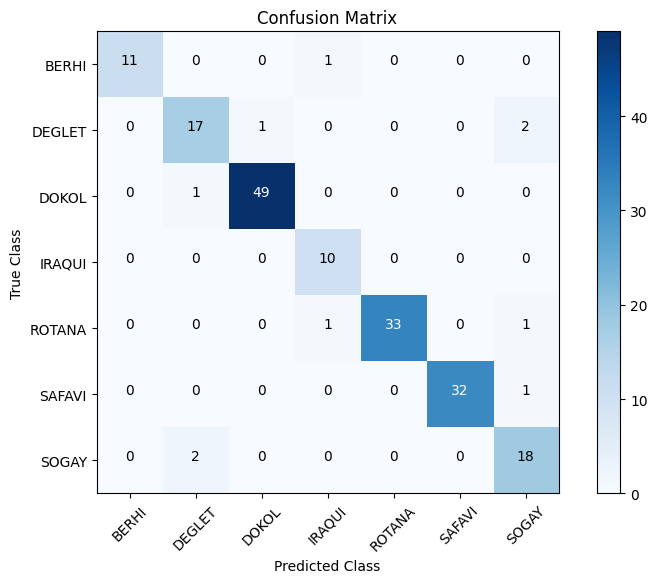

In [34]:
# Function to plot the confusion matrix.

def plot_confusion_matrix(cm, classes):
    """
    Plots a confusion matrix.

    Args:
        cm (numpy.array): Confusion matrix.
        classes (list): List of class labels.

    Returns:
        None
    """
    cmap = plt.cm.Blues
    plt.figure(figsize=(10, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.title('Confusion Matrix')
    plt.show()

# Parameters
true_values = Y_test
predicted_values = predictions_mlp

# Confusion Matrix
cm = confusion_matrix(true_values, predicted_values)
classes = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQUI', 'ROTANA', 'SAFAVI', 'SOGAY']
plot_confusion_matrix(cm, classes)